<a href="https://colab.research.google.com/github/Manish927/Algorithm/blob/patch1/NumPy_Image_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Images are represented by arrays of pixels, where each pixel contains information about colour and brightness. We can manipulate images at the pixel level using libraries such as NumPy.

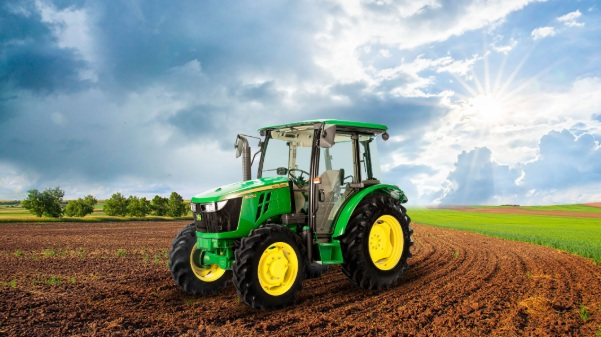

In [4]:
from PIL import Image
import numpy as np

# uncomment to upload the image locally
# from google.colab import files
# uploaded = files.upload()

image = Image.open('tractor_img.jpg')
image

In [ ]:
# convert the image to an array, which will allow us to work directly with it's pixels
image_array = np.array(image)
image_array.shape # height x width x pixel

# The array is 3D array with the dimensions (height, width, 3) where each pixel is represented by a set of three values corresponding to the RGB channels.

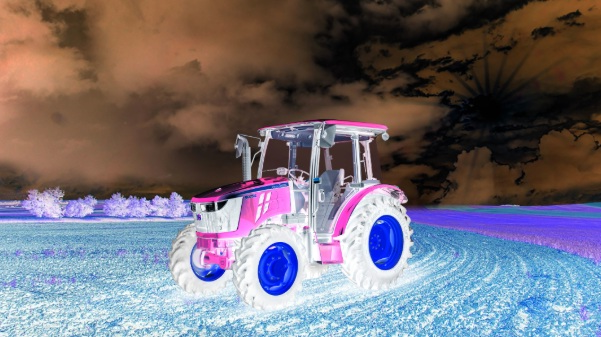

In [9]:
# Let's perform some simple image manipulation
# RGB values take the range [0, 255] for each colour. (0,0,0) for (R,G,B) corresponds to black, of the complete absence of colour while (255, 255, 255) corresponds to white.
# To invert an image, therefore, we need to subtract each pixel value from 255.
inverted_image_array = 255 - image_array    # do the broadcast operation
inverted_image = Image.fromarray(inverted_image_array)    # convert the array back to an image and view it
inverted_image

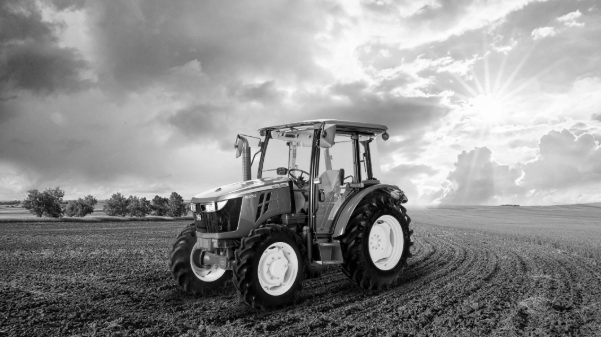

In [12]:
# Convert to greyscale
# To convert an image to greyscale, we need to apply a formula which will weigh each channel to arrive at the range of colours that the human eye apporximately interprets as grey.
# grey = 0.2989.R + 0.5870.G + 0.1140.B
greyscale_image_array = 0.2989 * image_array[:, :, 0] + 0.5870 * image_array[:, :, 1] + 0.1140 * image_array[:, :, 2]
# greyscale_image_array = np.dot(image_array[...,: 3], [0.2989, 0.5870, 0.1140])
greyscale_image_array = greyscale_image_array.astype(np.uint8)    # as Image.fromarry() cannot handle float values
greyscale_image = Image.fromarray(greyscale_image_array)
greyscale_image

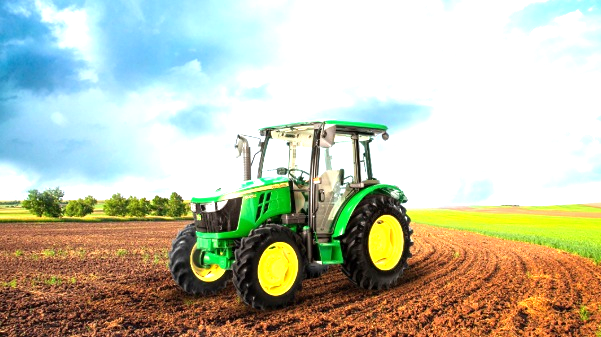

In [15]:
# Adjusting brightness
# brightness can be adjusted by simply adding more of the colour value to the image. We need to ensure that the image range of values does not leave [0, 255]
# to this we can use np.clip() function, which clips values based on lower and upper bounds.
brightness_factor = 1.5  # increasing brightness by 50%
brightened_image_arr = np.clip(image_array * brightness_factor, 0, 255)
brightened_image = Image.fromarray(brightened_image_arr.astype(np.uint8))
brightened_image


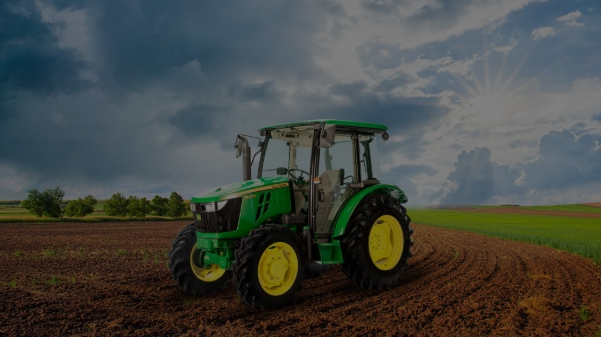

In [16]:
brightness_factor = 0.5  # decreasing brightness by 50%
darkened_image_arr = np.clip(image_array * brightness_factor, 0, 255)
darkened_image = Image.fromarray(darkened_image_arr.astype(np.uint8))
darkened_image

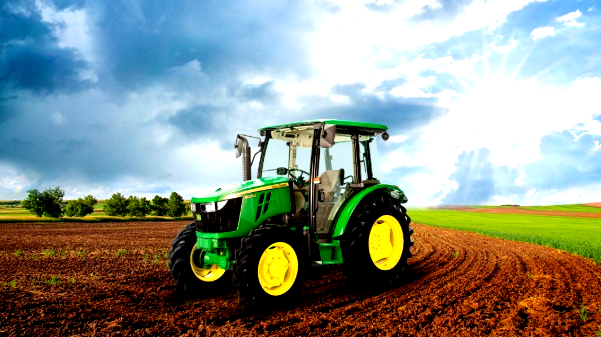

In [19]:
# Adjusting contrast
# Contrast can be adjusted by scaling pixel values around the mean image brightness. Increasing the distance from the mean for each pixel boosts contrast, which means dark becomes darker and bright becomes brighter

mean = np.mean(image_array)
contrast_factor = 1.5  # increasing contrast by 50%,  1.8 is 80%
contrast_image_arr = np.clip((image_array - mean) * contrast_factor + mean, 0, 255)
contrasted_image = Image.fromarray(contrast_image_arr.astype(np.uint8))
contrasted_image

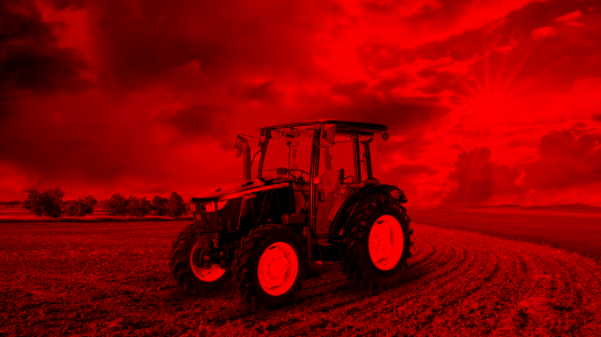

In [20]:
# Filtering colours
# we can turn off some colour channels and leave the rest on. For instancce we could just leave the red channel ON.
red_channel_image_arr = image_array.copy()
red_channel_image_arr[:, :, 1] = 0    # se green channel to 0
red_channel_image_arr[:, :, 2] = 0    # set blue channel to 0
red_channel_image = Image.fromarray(red_channel_image_arr.astype(np.uint8))
red_channel_image

In [ ]:
# Rotating an image
# anti clock wise
acw_rotated_image = image.transpose(Image.ROTATE_90)
acw_rotated_image = image.transpose(Image.ROTATE_270)
acw_rotated_image

In [ ]:
# Rotating an image in anti clockwise using rot90
acw_rotated_image_arr = np.rot90(image_array, k = 1)    # k = 1 represents anti clockwise rotation
acw_rotated_image = Image.fromarray(acw_rotated_image_arr.astype(np.uint8))
acw_rotated_image

In [ ]:
cw_rotated_image_arr = np.rot90(image_array, k = -1)    # k = -1 represents clockwise rotation
cw_rotated_image = Image.fromarray(cw_rotated_image_arr.astype(np.uint8))
cw_rotated_image

In [ ]:
# Flipping an image
flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
flipped_image

In [ ]:
# Flipping an image horizontally using np.flip
h_flipped_image_arr = np.flip(image_array, axis = 1)
h_flipped_image = Image.fromarray(h_flipped_image_arr.astype(np.uint8))
h_flipped_image

In [ ]:
# Flipping an image vertically
v_flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
v_flipped_image

In [ ]:
# Flipping an image vertically using np.flip
v_flipped_image_arr = np.flip(image_array, axis = 0)
v_flipped_image = Image.fromarray(v_flipped_image_arr.astype(np.uint8))
v_flipped_image
